In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error

In [12]:
# Load the data
btc_data = pd.read_csv('../data/XBTUSD-1d-data.csv')

In [13]:
btc_data.head()

,Date,symbol,open,high,low,close,trades,volume,vwap,lastSize,turnover,homeNotional,foreignNotional
0,2015-09-26 00:00:00+00:00,XBTUSD,239.99,239.99,234.81,235.20,153,190090,235.910,24,44844188670,448.441887,105792.660735
1,2015-09-27 00:00:00+00:00,XBTUSD,235.20,235.36,232.91,234.51,146,258488,233.990,200,60483729840,604.837298,141526.710902
2,2015-09-28 00:00:00+00:00,XBTUSD,234.51,234.76,233.03,233.29,101,161013,233.550,1000,37604645900,376.046459,87825.998859
3,2015-09-29 00:00:00+00:00,XBTUSD,233.29,243.19,232.90,240.07,262,319143,237.981,50,75949944400,759.499444,180755.759328
4,2015-09-30 00:00:00+00:00,XBTUSD,240.07,241.50,235.81,237.00,285,368771,238.266,9000,87865511830,878.655118,209360.657739


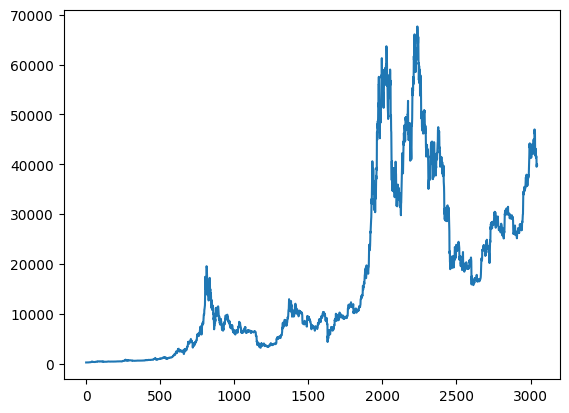

In [14]:
plt.plot(btc_data['close'])

In [15]:
# Split the data into train and test sets
to_train = int(len(btc_data) * 0.9)
train_data = list(btc_data[0:to_train]['close'])
test_data = list(btc_data[to_train:]['close'])

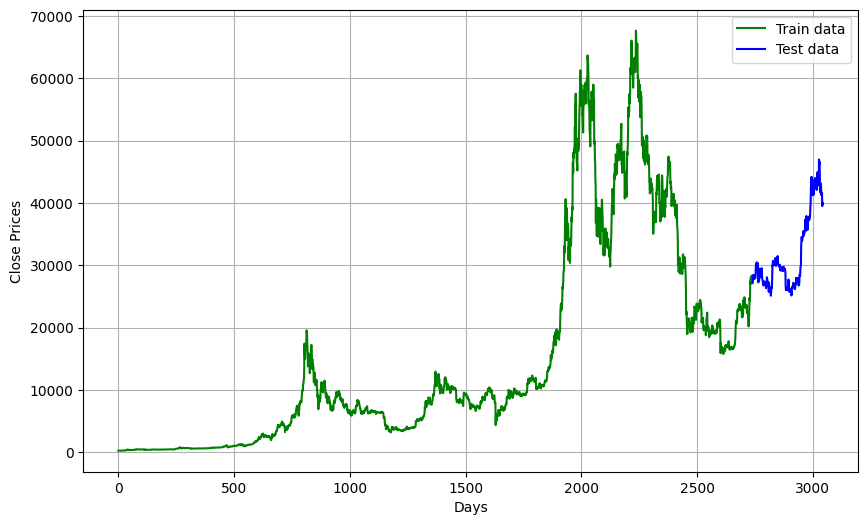

In [16]:
plt.figure(figsize=(10, 6))
plt.grid(True)
plt.xlabel('Days')
plt.ylabel('Close Prices')
plt.plot(btc_data[0:to_train]['close'], 'green', label='Train data')
plt.plot(btc_data[to_train:]['close'], 'blue', label='Test data')
plt.legend()

In [17]:
# Train the ARIMA model
model_predictions = []
n_test_observations = len(test_data)

In [18]:
for i in range(n_test_observations):
    model = ARIMA(train_data, order=(5,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    model_predictions.append(yhat)
    actual_test_value = test_data[i]
    train_data.append(actual_test_value)

In [19]:
print('Mean Absolute Error:', mean_absolute_error(test_data, model_predictions))

Mean Absolute Error: 471.87444784899424


In [20]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 3044
Model:                 ARIMA(5, 1, 0)   Log Likelihood              -24818.625
Date:                Mon, 18 Mar 2024   AIC                          49649.250
Time:                        15:38:01   BIC                          49685.374
Sample:                             0   HQIC                         49662.234
                               - 3044                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0409      0.010     -4.012      0.000      -0.061      -0.021
ar.L2          0.0024      0.010      0.243      0.808      -0.017       0.022
ar.L3          0.0259      0.011      2.417      0.0

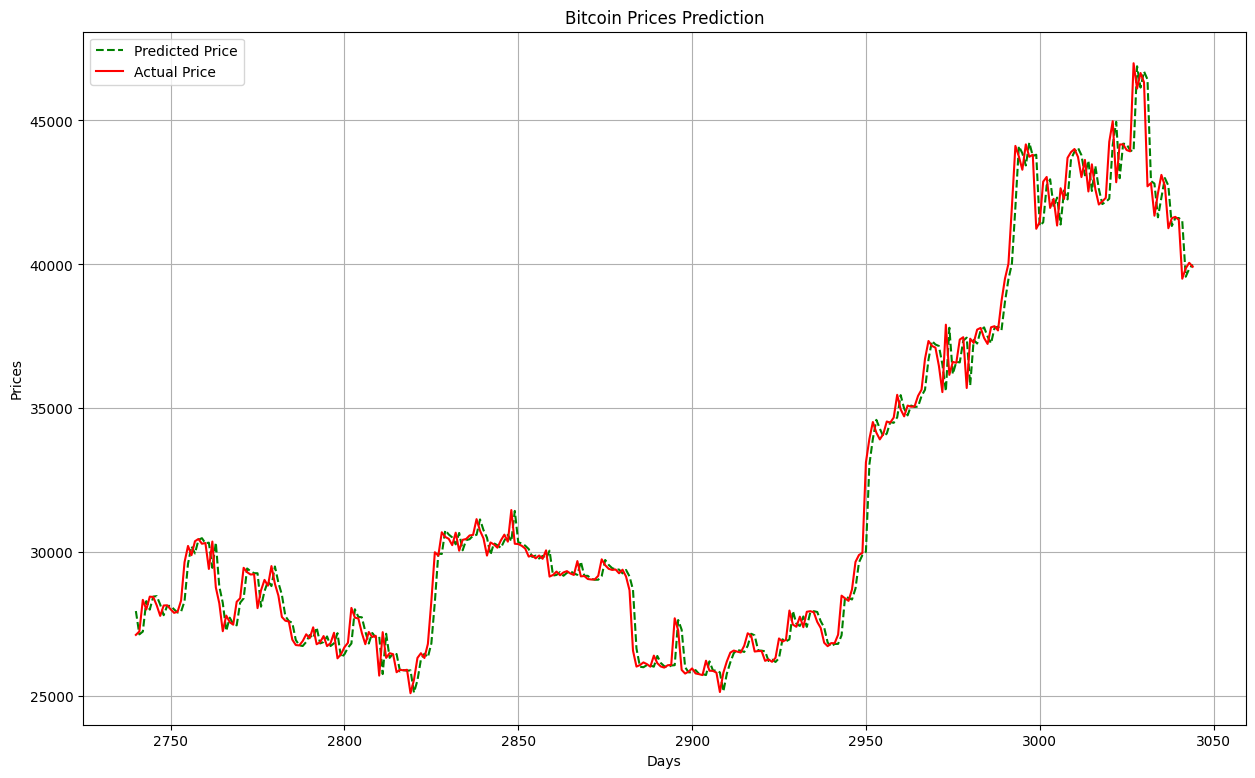

In [21]:
plt.figure(figsize=(15, 9))
plt.grid(True)

date_range = btc_data[to_train:].index

plt.plot(date_range, 
         model_predictions, 
         color='green',  
         linestyle='dashed', 
         label='Predicted Price',
         )

plt.plot(date_range,
         test_data, 
         color='red', 
         label='Actual Price'
         )

plt.title('Bitcoin Prices Prediction')
plt.xlabel('Days')
plt.ylabel('Prices')
plt.legend()
plt.show()


In [25]:

MAE = mean_absolute_error(test_data[:-1], model_predictions[:-1])
print(f'Mean Absolute Error: {MAE}')

RMSE = np.sqrt(np.mean((np.array(test_data[:-1]) - np.array(model_predictions[:-1]))**2))
print(f'Root Mean Squared Error: {RMSE}')

MAPE = MAE / np.mean(test_data[:-1]) * 100
print(f'Mean Absolute Percentage Error: {MAPE}')

Mean Absolute Error: 473.18084111273436
Root Mean Squared Error: 732.333811144383
Mean Absolute Percentage Error: 1.4910297484389854


In [ ]:
# Plot the actual and predicted prices. MAPE = 1.49%. This means that the model is 98.51% accurate in predicting the price of Bitcoin.